In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#desenvolver modelo para prever renda do cliente ('contínua')

In [92]:
df = pd.read_csv('base_banco.csv')
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,9120.0,13,0,6,0,2.0
1,0.957151,40,0,2600.0,4,0,0,0,1.0
2,0.658180,38,1,3042.0,2,1,0,0,0.0
3,0.233810,30,0,3300.0,5,0,0,0,0.0
4,0.907239,49,1,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...
120264,0.385742,50,0,3400.0,7,0,0,0,0.0
120265,0.040674,74,0,2100.0,4,0,1,0,0.0
120266,0.299745,44,0,5584.0,4,0,1,0,2.0
120267,0.000000,30,0,5716.0,4,0,0,0,0.0


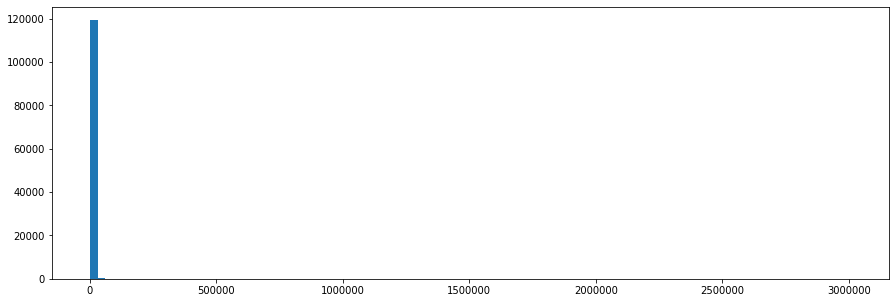

In [93]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins=100);
#eita porra, que histograma lixo!

In [94]:
np.logspace(0, 3, 10)

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08]),
 <a list of 11 Text xticklabel objects>)

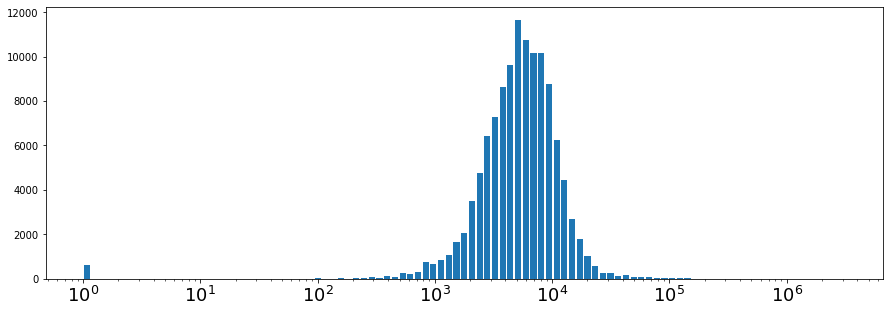

In [95]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0, 6.5, 100), rwidth=0.8)
plt.xscale('log')
plt.xticks(fontsize=18)


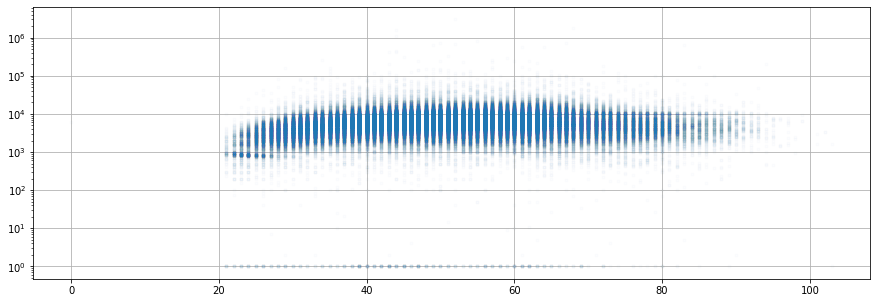

In [96]:
#renda x idade
plt.figure(figsize= (15,5))
plt.plot(df.age, df.MonthlyIncome, '.', alpha=0.01)
plt.yscale('log')
plt.grid()

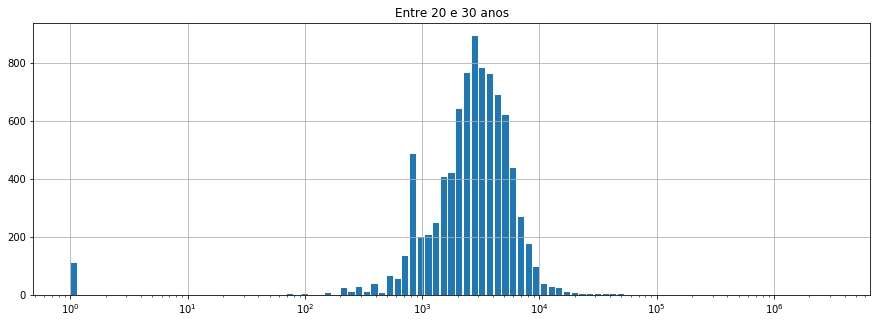

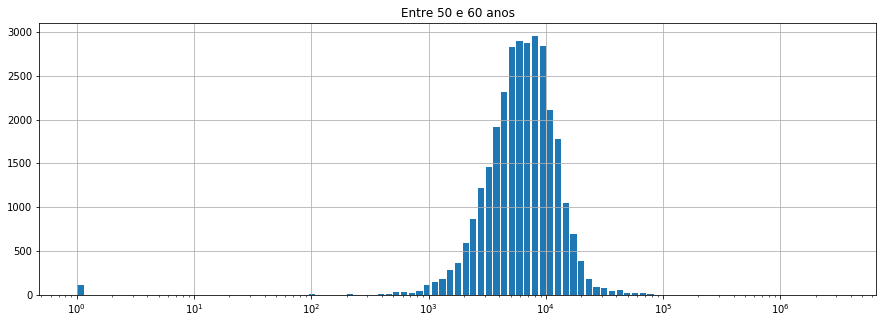

In [97]:
plt.figure(figsize=(15, 5))
plt.hist(df.loc[(df.age>=20) & (df.age<=30)].MonthlyIncome, bins=np.logspace(0, 6.5, 100), rwidth=0.8)
plt.xscale('log')
plt.title('Entre 20 e 30 anos')
plt.grid()

plt.figure(figsize=(15, 5))
plt.hist(df.loc[(df.age>=50) & (df.age<=60)].MonthlyIncome, bins=np.logspace(0, 6.5, 100), rwidth=0.8)
plt.xscale('log')
plt.title('Entre 50 e 60 anos')
plt.grid()



In [98]:
#separar em variáveis preditivas e resposta
X = df.drop('MonthlyIncome', axis=1)
y = df.MonthlyIncome

In [99]:

from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3)

In [100]:
#treinando o modelo
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
y_ts

34327      5939.0
23765      3750.0
35208      3633.0
30566      2409.0
84131      5800.0
           ...   
90369      7920.0
58361      9300.0
11148     11500.0
112444     2300.0
45210      8600.0
Name: MonthlyIncome, Length: 36081, dtype: float64

In [102]:
rf.predict(X_ts)

array([ 9196.51305105,  4042.90563649,  7186.37850499, ...,
       10010.30570071,  8310.76515551,  5333.03607131])

In [103]:
erro = y_ts - rf.predict(X_ts)
erro

34327    -3257.513051
23765     -292.905636
35208    -3553.378505
30566    -3963.078637
84131     1401.752927
             ...     
90369     1737.645592
58361     2853.386791
11148     1489.694299
112444   -6010.765156
45210     3266.963929
Name: MonthlyIncome, Length: 36081, dtype: float64

In [104]:
erro.mean()

-290.268189540647

In [105]:
erro_abs = np.abs(y_ts - rf.predict(X_ts))
erro_abs

34327     3257.513051
23765      292.905636
35208     3553.378505
30566     3963.078637
84131     1401.752927
             ...     
90369     1737.645592
58361     2853.386791
11148     1489.694299
112444    6010.765156
45210     3266.963929
Name: MonthlyIncome, Length: 36081, dtype: float64

In [106]:
erro_abs.mean()

3285.2753024339845

In [112]:
#tem erro absoluto médio direto no sklearn, não precisa calcular isso aí não
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts, rf.predict(X_ts))

3285.2753024339813

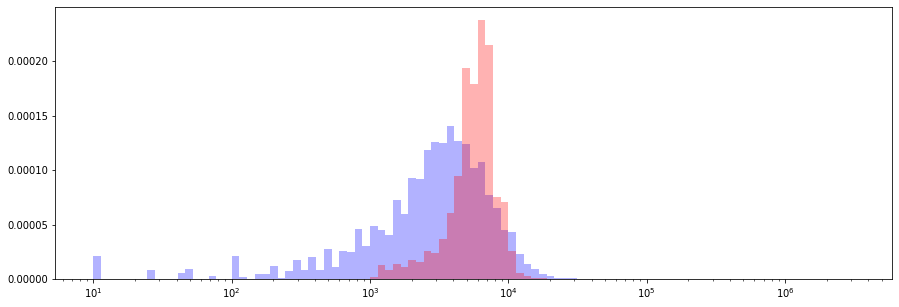

In [115]:
plt.figure(figsize=(15,5))
plt.hist(y_ts, bins=np.logspace(1, 6.5, 100), color='b', alpha=.3, density=True)
plt.hist(rf.predict(X_ts), bins=np.logspace(1, 6.5, 100), color='r', alpha=.3, density=True)
plt.xscale('log')    
         